### ⚙️ Connecting to the Python Kernel

Before you run any code, make sure your Jupyter notebook is connected to a Python environment — this is called the **kernel**.

- Look in the top-right corner of your notebook — you should see something like: `Python 3 (ipykernel).` This is in the bar which says stuff like "+ Code" "+ Markdown" et cetera.
- If it says `No Kernel` or shows an error, click it and choose a Python version (e.g., Python 3.11 or 3.12 — whichever one you installed earlier)
- If prompted, allow Jupyter to install the kernel — it will do this automatically

> 🛠️ Without connecting to a kernel, your code won’t run!


### 🧩 Install Required Libraries (if not installed)

In Python, we use **libraries** to simplify and speed up our calculations and data handling. These libraries are like toolkits that someone else built for us — so we don’t have to reinvent the wheel.

To install them, just press the "Run" ▶️ button below (on the code cell), and it will take care of the installation.

If you see a message like `Requirement already satisfied`, that’s totally fine — it just means you already have it installed.


In [38]:
%pip install pandas numpy matplotlib seaborn scipy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sys
import os

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 📁 Cell 2 – Load Excel Data

Alright, now let’s load in the data we copy-pasted from PSX and saved in our Excel file.

You probably noticed that the Excel file has multiple sheets — one for each stock, labeled by its ticker (e.g., `ENGRO`, `ABL`, `INDUS`, etc.).

We're going to load them one by one using `pandas`, a super handy library for data wrangling.

Each sheet will be loaded into a separate DataFrame — and then we’ll print the first few rows (using `.head()`) just to make sure everything looks good.

In [39]:
import os
import pandas as pd

path = "Data"   # or give the folder path where your CSVs are stored

returns = pd.DataFrame()
tickers = []
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        # Read the CSV
        df = pd.read_csv(os.path.join(path, filename))
        print(df.head())
        
        # Extract a ticker/short name from the filename
        # Example: "Habib Bank Stock Price History.csv" -> "HBL"
        name_parts = filename.replace(".csv", "").split()
        ticker = "".join([word[0] for word in name_parts[:2]])  # take initials of first two words
        # You can customize this depending on your naming scheme
        tickers.append(ticker)
        # Clean "Change %" column
        returns[ticker] = df["Change %"].str.replace('%', '', regex=False).astype(float) / 100

returns.head()


         Date   Price   Open    High     Low     Vol. Change %
0  08/28/2025  202.50  203.5  204.18  201.00  497.17K   -0.39%
1  08/27/2025  203.30  203.8  205.50  202.70  728.98K   -0.25%
2  08/26/2025  203.80  206.8  206.80  202.54    2.75M   -0.84%
3  08/25/2025  205.53  206.0  206.94  204.90    1.22M    0.25%
4  08/22/2025  205.02  206.5  208.00  204.00  835.71K   -0.69%
         Date   Price    Open    High     Low     Vol. Change %
0  08/28/2025  403.03  395.00  405.00  394.00  675.53K    1.34%
1  08/27/2025  397.70  405.00  410.00  396.60  517.24K   -1.95%
2  08/26/2025  405.59  420.09  432.00  400.02    2.41M   -3.45%
3  08/25/2025  420.08  424.00  427.98  416.00  401.05K   -0.88%
4  08/22/2025  423.80  425.21  436.00  422.00  676.32K   -0.33%
         Date   Price    Open    High     Low     Vol. Change %
0  08/28/2025  248.47  255.51  256.87  247.00    2.48M   -2.60%
1  08/27/2025  255.10  261.95  261.95  253.00  983.28K   -1.38%
2  08/26/2025  258.68  263.40  264.50  258.00 

,EF,GP,HB,ME,Oa,TT,XH
0,-0.0039,0.0134,-0.0260,0.0046,0.0035,0.0231,0.0039
1,-0.0025,-0.0195,-0.0138,-0.0124,-0.0003,-0.0223,0.0009
2,-0.0084,-0.0345,-0.0115,0.0108,-0.0021,-0.0864,0.0077
3,0.0025,-0.0088,-0.0105,-0.0045,-0.0082,-0.0461,-0.0007
4,-0.0069,-0.0033,-0.0023,-0.0006,0.0083,0.0209,-0.0009


In [40]:
daily_mean_returns = returns.mean()
daily_std_devs = returns.std()

# Annualize them
annualized_returns = daily_mean_returns * 252
annualized_volatility = daily_std_devs * (252 ** 0.5)

# Combine results into one DataFrame for display
summary = pd.DataFrame({
    "Daily Mean Return": daily_mean_returns,
    "Daily Std Dev": daily_std_devs,
    "Annualized Return": annualized_returns,
    "Annualized Volatility": annualized_volatility
})

summary["Return/Volatility"] = summary["Annualized Return"] / summary["Annualized Volatility"]


print(summary)

summary.to_csv("asset summary.csv")

    Daily Mean Return  Daily Std Dev  Annualized Return  \
EF           0.001178       0.020590           0.296733   
GP           0.004192       0.029858           1.056275   
HB           0.003000       0.025589           0.756101   
ME           0.001291       0.018360           0.325272   
Oa           0.003031       0.024659           0.763692   
TT           0.006922       0.050124           1.744365   
XH           0.001288       0.010811           0.324463   

    Annualized Volatility  Return/Volatility  
EF               0.326858           0.907834  
GP               0.473976           2.228540  
HB               0.406217           1.861326  
ME               0.291454           1.116031  
Oa               0.391450           1.950928  
TT               0.795695           2.192252  
XH               0.171618           1.890609  


### 📊 Cell 3 – Covariance and Correlation Matrix + Heatmap

Before we build our portfolio, we need to understand something important:

> How do these stocks move with each other?

This is where **correlation** and **covariance** come in.

- **Covariance** tells us the direction of how two stocks move together (positive or negative)
- **Correlation** goes one step further and tells us how strong that relationship is (between -1 and 1)

To really "see" the relationships, we’ll plot a **heatmap** using `seaborn`.

- A value close to `1` → two stocks move together
- A value close to `-1` → they move in opposite directions
- A value near `0` → no clear relationship


In [41]:
# Calculate daily covariance matrix
daily_cov_matrix = returns.cov()

# Annualize the covariance matrix
annualized_cov_matrix = daily_cov_matrix * 252

# Display the result
print(annualized_cov_matrix)

          EF        GP        HB        ME        Oa        TT        XH
EF  0.106836  0.044330  0.059016  0.050785  0.051253  0.045825  0.000156
GP  0.044330  0.224653  0.044478  0.063188  0.080045  0.046318 -0.008533
HB  0.059016  0.044478  0.165012  0.053883  0.045683  0.068388  0.003443
ME  0.050785  0.063188  0.053883  0.084946  0.074111  0.017485 -0.002213
Oa  0.051253  0.080045  0.045683  0.074111  0.153233  0.001911  0.000703
TT  0.045825  0.046318  0.068388  0.017485  0.001911  0.633131 -0.015283
XH  0.000156 -0.008533  0.003443 -0.002213  0.000703 -0.015283  0.029453


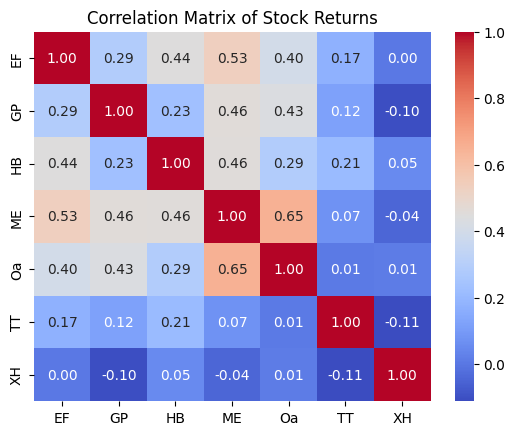

In [42]:
# Calculate correlation matrix from daily returns
correlation_matrix = returns.corr()

# Display it
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Returns')   
plt.show()

### 🎲 Cell 5 – Equal Weighted Portfolio. Investing the same money in each asset. 


Calculating the risk of this

In [43]:
import numpy as np

# Example: equal weights for 3 stocks
weights = np.ones(len(returns.columns)) / len(returns.columns)

# Portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(annualized_cov_matrix, weights))

# Portfolio standard deviation
portfolio_volatility = np.sqrt(portfolio_variance)

print("Annualized Portfolio Variance:", portfolio_variance)
print("Annualized Portfolio Volatility:", portfolio_volatility)

Annualized Portfolio Variance: 0.058106328719653315
Annualized Portfolio Volatility: 0.24105254348306163


1000 Randomly Weighted Portfolios, with their risks and returns (Just for visualization purposes.)

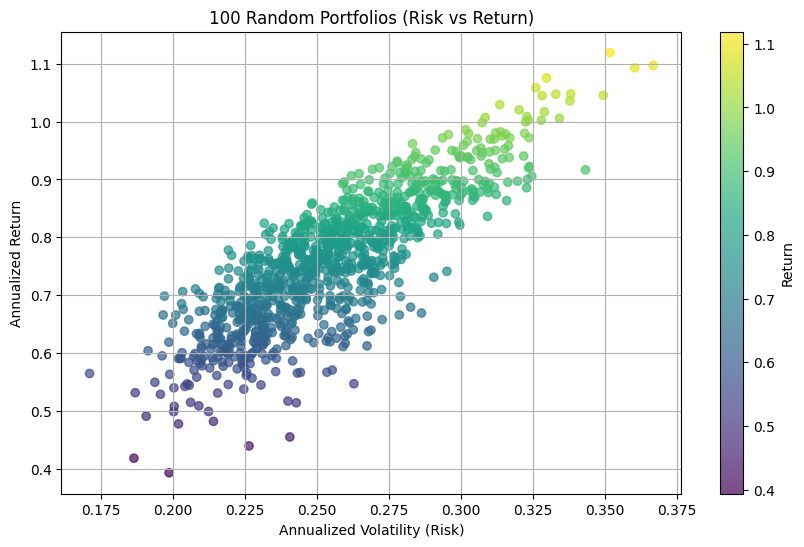

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Store results
num_portfolios = 1000
all_weights = []
returns_list = []
volatility_list = []

# Loop to generate portfolios
for _ in range(num_portfolios):
    # Create random weights that sum to 1
    weights = np.random.random(len(returns.columns))
    weights /= np.sum(weights)
    
    all_weights.append(weights)
    
    # Expected return
    portfolio_return = np.dot(weights, annualized_returns)
    returns_list.append(portfolio_return)
    
    # Portfolio variance and volatility
    portfolio_volatility = np.sqrt(np.dot(weights.T, 
                                 np.dot(annualized_cov_matrix, weights)))
    volatility_list.append(portfolio_volatility)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(volatility_list, returns_list, c=returns_list, cmap='viridis', alpha=0.7)
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.title("100 Random Portfolios (Risk vs Return)")
plt.colorbar(label="Return")
plt.grid(True)
plt.show()

### 📉 Cell 6 – Compute Global Minimum Variance Portfolio (GMVP)
🧠 What is GMVP?
It’s the portfolio with the lowest possible risk (standard deviation),
Think of it as the portfolio that wiggles the least on the chart!

In [45]:
from scipy.optimize import minimize

# Number of assets
num_assets = len(returns.columns)

# Initial guess (equal weights)
initial_weights = np.array([1/num_assets] * num_assets)

# Bounds for weights: between 0 and 1
bounds = tuple((0, 1) for _ in range(num_assets))

# Constraint: sum of weights = 1
constraints = ({
    'type': 'eq',
    'fun': lambda w: np.sum(w) - 1
})

# Function to minimize: portfolio volatility
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

# Run the optimizer
gmvp_result = minimize(portfolio_volatility,
                       initial_weights,
                       method='SLSQP',
                       bounds=bounds,
                       constraints=constraints)

# Extract optimal weights
gmvp_weights = gmvp_result.x
gmvp_volatility = portfolio_volatility(gmvp_weights)
gmvp_return = np.dot(gmvp_weights, annualized_returns)

# Display results
print("Global Minimum Variance Portfolio Weights:")
for stock, weight in zip(returns.columns, gmvp_weights):
    print(f"{stock}: {weight:.4f}")

print(f"\nExpected Return: {gmvp_return:.4f}")
print(f"Volatility (Risk): {gmvp_volatility:.4f}")

Global Minimum Variance Portfolio Weights:
EF: 0.0669
GP: 0.0455
HB: 0.0000
ME: 0.1611
Oa: 0.0000
TT: 0.0343
XH: 0.6922

Expected Return: 0.4047
Volatility (Risk): 0.1382


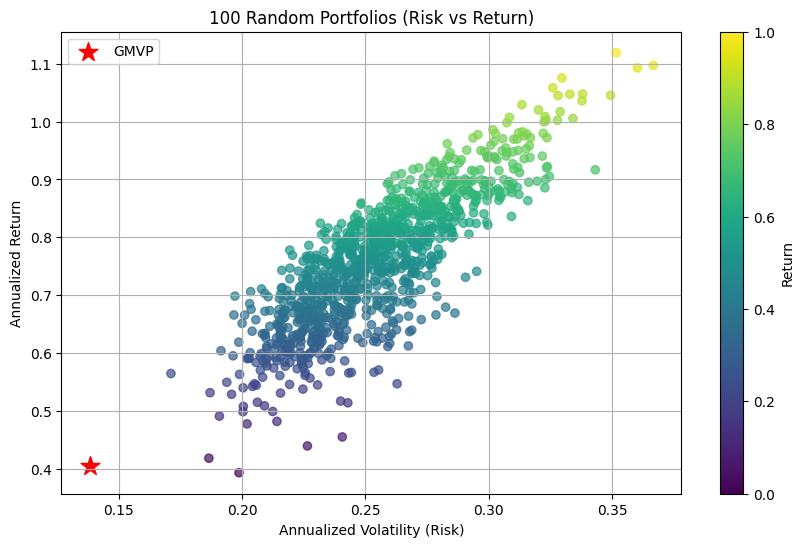

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(volatility_list, returns_list, c=returns_list, cmap='viridis', alpha=0.7)
plt.scatter(gmvp_volatility, gmvp_return, color='red', marker='*', s=200, label='GMVP')
plt.legend()
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.title("100 Random Portfolios (Risk vs Return)")
plt.colorbar(label="Return")
plt.grid(True)
plt.show()

### 🎯 **Cell – Constructing the Efficient Frontier**

Now that we’ve computed the Global Minimum Variance Portfolio (GMVP), it’s time to build the full Efficient Frontier.

---

### 🚀 What Are We Doing?

We are solving **500 mini optimization problems**, one for each **target return level**, starting just above the GMVP return and going up to a reasonable upper bound (e.g., 45).

At each target return, we’re finding the portfolio with the **lowest possible risk (standard deviation)** — these optimal portfolios collectively form the Efficient Frontier.

---

### 🧮 Mathematically Speaking

We’re minimizing the **portfolio volatility**, which is the square root of the weighted covariance matrix:

    minimize: sqrt(w.T @ Sigma @ w)

Subject to:

    sum(w) = 1                  # Fully invested portfolio
    w.T @ mu = target_return    # Portfolio return equals target
    0 <= w_i <= 1               # No short selling

Where:

- `w`: portfolio weights (what we’re solving for)
- `mu`: expected return vector (scaled to the total investment horizon)
- `Sigma`: scaled covariance matrix of asset returns

---

### 📌 Why This Matters

This set of portfolios represents the **most efficient way to invest**:
For every level of return, we find the portfolio that achieves it with the **least amount of risk**.

---

### 📤 Output

This process gives us two lists:

- `efficient_risks`: the minimum possible risk for each return level
- `efficient_weights`: the portfolio weights to achieve it

These will allow us to **plot the Efficient Frontier**, compare it with the Monte Carlo cloud, and understand how far off random portfolios are from optimal.

---


Text(0.5, 1.0, 'Efficient Frontier')

<Figure size 1000x600 with 0 Axes>

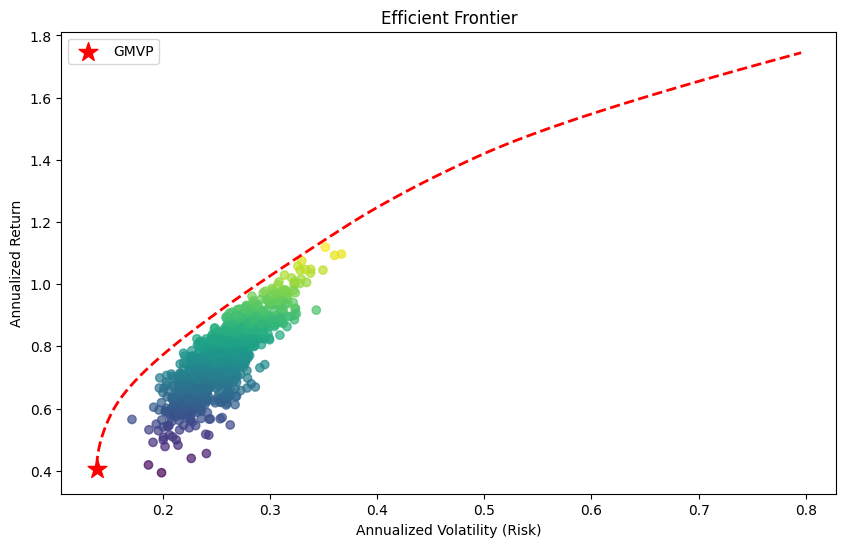

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Number of assets
n_assets = len(annualized_returns)

# Target returns range (between min and max of individual assets)
target_returns = np.linspace(gmvp_return + 0.01, #just a little more than GMVP return 
                             annualized_returns.max(), 100)

# Store results
efficient_volatility = []
efficient_weights = []

# Constraints and bounds (same for all optimizations)
bounds = tuple((0, 1) for _ in range(n_assets))

# Loop through each target return
for r_target in target_returns:
    
    # Constraints:
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # weights sum to 1
        {'type': 'eq', 'fun': lambda w: np.dot(w, annualized_returns) - r_target}  # target return
    )

    # Initial guess
    init_guess = np.array([1/n_assets] * n_assets)

    # Minimize portfolio volatility
    result = minimize(
        lambda w: np.sqrt(np.dot(w.T, np.dot(annualized_cov_matrix, w))),
        init_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    # Store results if optimization is successful
    if result.success:
        efficient_volatility.append(
            np.sqrt(np.dot(result.x.T, np.dot(annualized_cov_matrix, result.x)))
        )
        efficient_weights.append(result.x)
    else:
        efficient_volatility.append(np.nan)
        efficient_weights.append(None)

# Plot Efficient Frontier
plt.figure(figsize=(10,6))
plt.figure(figsize=(10, 6))
plt.scatter(volatility_list, returns_list, c=returns_list, cmap='viridis', alpha=0.7)
plt.scatter(gmvp_volatility, gmvp_return, color='red', marker='*', s=200, label='GMVP')
plt.plot(efficient_volatility, target_returns, 'r--', linewidth=2)
plt.legend()
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier')


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ipywidgets as widgets
from IPython.display import display, clear_output

# Build slider based on target return range
min_ret = np.round(gmvp_return + 0.01, 4)
max_ret = np.round(annualized_returns.max(), 4)

slider = widgets.FloatSlider(
    value=min_ret,
    min=min_ret,
    max=max_ret,
    step=0.001,
    description='Target Return:',
    continuous_update=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='60%')
)

toggle_bar = widgets.Checkbox(
    value=True,
    description='Show Portfolio Weights',
    style={'description_width': 'initial'}
)

output = widgets.Output()

def compute_optimal_portfolio(r_target):
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: np.dot(w, annualized_returns) - r_target}
    ]
    bounds = tuple((0, 1) for _ in range(n_assets))
    init_guess = np.array([1/n_assets] * n_assets)
    
    result = minimize(
        lambda w: np.sqrt(np.dot(w.T, np.dot(annualized_cov_matrix, w))),
        init_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    return result

def update_plot(change):
    with output:
        clear_output(wait=True)
        
        r_target = slider.value
        result = compute_optimal_portfolio(r_target)

        if not result.success:
            print("Optimization failed.")
            return

        weights = result.x
        vol = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

        # Plot Efficient Frontier + GMVP + Scatter + Marker
        plt.figure(figsize=(8, 4))
        plt.scatter(volatility_list, returns_list, c=returns_list, cmap='viridis', alpha=0.6, label="Random Portfolios")
        plt.scatter(gmvp_volatility, gmvp_return, color='red', marker='*', s=200, label='GMVP')
        plt.plot(efficient_volatility, target_returns, 'r--', label='Efficient Frontier')
        plt.scatter(vol, r_target, color='blue', s=100, label='Selected Portfolio')
        plt.xlabel('Annualized Volatility (Risk)')
        plt.ylabel('Annualized Return')
        plt.title('Efficient Frontier - Interactive')
        plt.legend()
        plt.grid(True)
        plt.show()

        if toggle_bar.value:
            # Bar chart of weights
            plt.figure(figsize=(8, 4))
            plt.bar(returns.columns, weights, color='skyblue')
            plt.title(f"Portfolio Weights for Return = {r_target:.2%}")
            plt.ylabel("Weight")
            plt.ylim(0, 1)
            plt.grid(True, axis='y')
            plt.show()
        
        # Display exact numbers
        print(f"Target Return: {r_target:.4%}")
        print(f"Portfolio Volatility: {vol:.4%}")
        for asset, weight in zip(returns.columns, weights):
            print(f"{asset}: {weight:.4%}")

# Bind slider to update function
slider.observe(update_plot, names='value')
toggle_bar.observe(update_plot, names='value')

# Display controls
display(slider, toggle_bar, output)

# Initial plot
update_plot(None)


FloatSlider(value=0.4147, continuous_update=False, description='Target Return:', layout=Layout(width='60%'), m…

Checkbox(value=True, description='Show Portfolio Weights', style=CheckboxStyle(description_width='initial'))

Output()

### 📄 Cell 7 – Store Weights and Metrics

Now let’s make sure we don’t lose our hard work.

For every point on our optimized Efficient Frontier, we’ll:
- Store the portfolio weights for each stock
- Keep the corresponding expected return and risk
- Optionally calculate the Sharpe Ratio (performance metric)

We’ll save everything in a pandas DataFrame and can export it to CSV or Excel.

This gives us a complete record of every "efficient" portfolio we generated!


In [57]:
import pandas as pd


# Create a dictionary to store everything
portfolio_results = {
    'monte_carlo': {
        'returns': np.array(returns_list),
        'risks': np.array(volatility_list),
        'weights': np.array(all_weights)
    },
    'efficient_frontier': {
        'target_returns': target_returns,
        'efficient_risks': np.array(efficient_volatility),
        'efficient_weights': efficient_weights
    },
    'gmvp': {
        'return': gmvp_return,
        'risk':  gmvp_volatility,
        'weights': gmvp_weights
    }
}


# Convert to DataFrames
monte_carlo_df = pd.DataFrame({
    'Return': portfolio_results['monte_carlo']['returns'],
    'Risk': portfolio_results['monte_carlo']['risks']
})

efficient_df = pd.DataFrame({
    'Target Return': portfolio_results['efficient_frontier']['target_returns'],
    'Efficient Risk': portfolio_results['efficient_frontier']['efficient_risks']
})

gmvp_df = pd.DataFrame({
    'GMVP Return': [portfolio_results['gmvp']['return']],
    'GMVP Risk': [portfolio_results['gmvp']['risk']]
})

# Save everything to Excel
with pd.ExcelWriter('portfolio_results.xlsx') as writer:
    monte_carlo_df.to_excel(writer, sheet_name='Monte Carlo', index=False)
    efficient_df.to_excel(writer, sheet_name='Efficient Frontier', index=False)
    gmvp_df.to_excel(writer, sheet_name='GMVP', index=False)


🧮 **Cell – Make Your Own Portfolio**

Now it's your turn to create your own portfolio! 🎯

---

### 🛠 What You’ll Do:

You'll input a **target return** that you want your portfolio to achieve,  
and we’ll compute the **least risky (minimum variance)** portfolio that delivers that return.

This portfolio will lie on the **Efficient Frontier**, which means:
- You’re getting the **best possible risk-return tradeoff**
- No other portfolio with the same return will have less risk

---

### ⚙️ Behind the Scenes:

We’ll solve an optimization problem to:
- Minimize portfolio risk (volatility)
- Ensure your desired return is met
- Keep the weights valid (sum to 1, no short selling)

---

### 💡 Tip:

Choose a return between the **GMVP return (~30)** and **upper bound (~60)**  
Try different values to see how your portfolio shifts!

Let's go!


### 📉 **Cell – Define Risk-Free Rate for CAPM**

---

### 🚀 What Are We Doing?

To apply the **Capital Asset Pricing Model (CAPM)**, we need a **risk-free rate** — this is the return you’d get from an investment that has **zero default risk**.

In real-world finance, this is usually based on **government treasury bills** (T-bills), because they are backed by the government and are considered risk-free.

---

### 🏦 Why Use Treasury Bills?

We use **T-bills** because:
- They’re essentially default-free
- They are issued in **various maturities** (1, 3, 6, 12 months, etc.)
- They reflect the **time value of money** for different horizons

Since our portfolio simulation spans **~6–7 months**, we’ll use the **6-month T-bill rate** as a proxy for the risk-free rate.

> 💡 As of July 9, 2025, the 6-month T-bill rate in Pakistan was **10.8976%**.

You can use this or input your own if you prefer.


In [58]:
# 📌 Input your risk-free rate (in % annual terms)
risk_free_rate = float(input("Enter the annual risk-free rate (e.g., 10.8976): "))

print("Your risk free rate is set to: ", risk_free_rate, "%")
#covert risk free rate to decimal
risk_free_rate /= 100  # Convert percentage to decimal  
print("Your risk free rate is set to: ", risk_free_rate)

Your risk free rate is set to:  11.05 %
Your risk free rate is set to:  0.1105


### 📈 **Plotting the Risk-Free Rate**

Now that we’ve discussed the risk-free rate — which we’re taking from Treasury Bills — let’s go ahead and **plot it** on our overall portfolio graph.

We’ll place it at:
- **0 risk** (standard deviation)
- The **return equal to the T-Bill rate** (e.g., 6-month T-Bill = 10.9%)

This point will serve as the base of the **Capital Market Line (CML)** which connects the risk-free asset to our **tangency portfolio** (i.e., the portfolio with the highest Sharpe Ratio).

Let’s add it to our graph!


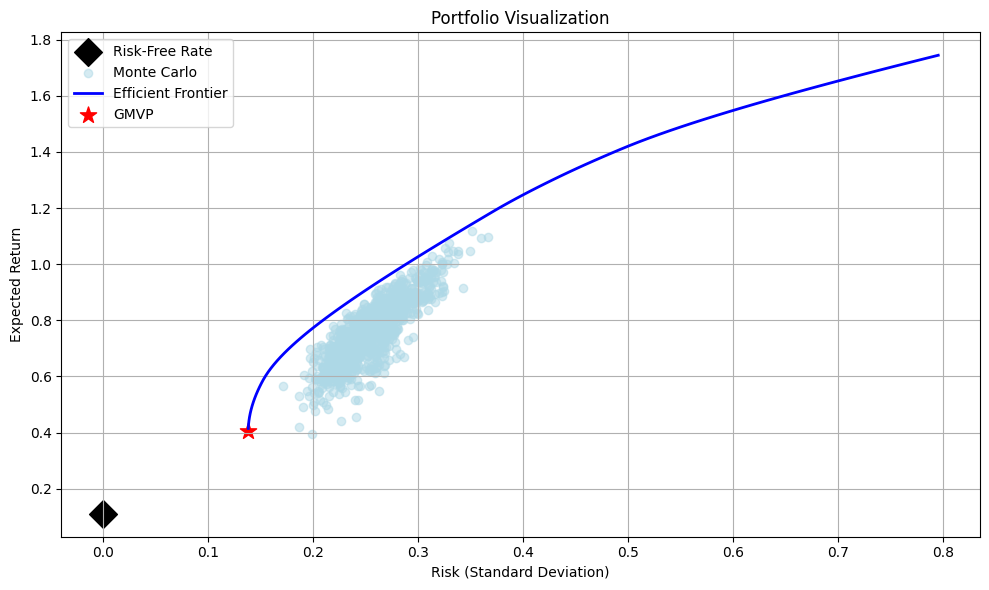

In [59]:
risk_free_risk = 0
plt.figure(figsize=(10, 6))
plt.scatter(risk_free_risk, risk_free_rate, color='black', s=200, marker='D', label='Risk-Free Rate')
plt.scatter(volatility_list, returns_list, c='lightblue', alpha=0.5, label='Monte Carlo')
plt.plot(efficient_volatility, target_returns, 'b-', linewidth=2, label='Efficient Frontier')
plt.scatter(gmvp_volatility, gmvp_return, color='red', s=150, marker='*', label='GMVP')



plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Portfolio Visualization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Great! Let's dive into some really fundamental and exciting concepts in modern portfolio theory — particularly:

---

### 📈 **Capital Market Line (CML)**

The **Capital Market Line** represents **all possible portfolios** that combine:

* The **risk-free asset** (like a Treasury bill)
* And **risky portfolios** on the **efficient frontier**

The **key idea** is this:
If you can **lend or borrow at the risk-free rate**, then instead of sticking with portfolios on the curved frontier, you can do better by combining the risk-free asset with **one optimal risky portfolio** — known as the **tangency portfolio**.

---

### 🎯 **Tangency Portfolio**

This is the **portfolio on the efficient frontier** that has the **highest Sharpe ratio**, i.e., the best return per unit of risk.

* It lies at the **point where the Capital Market Line is tangent to the Efficient Frontier**.
* Mathematically, the slope of the Capital Market Line is:

$$
\text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p}
$$

Where:

* $R_p$ is the return of the tangency portfolio
* $R_f$ is the risk-free rate
* $\sigma_p$ is the standard deviation (risk) of the tangency portfolio

This tangency point is the **most efficient portfolio** in the market when a risk-free asset is available.

---

### 🔄 **Inflection Point (GMVP)**

Before introducing the risk-free asset, the **Global Minimum Variance Portfolio (GMVP)** was the best you could do if you wanted the lowest risk possible.

* But with the risk-free asset, we can do better than GMVP in **risk-adjusted terms**.
* The **inflection point** matters because everything **below** it on the frontier has **lower return per unit of risk** than even the risk-free asset — and is therefore **dominated** by combinations of the risk-free rate and the tangency portfolio.

---

### 💡 What Changes with the CML?

Without a risk-free asset:

* You’re restricted to the **curved efficient frontier** (built only from risky assets).

With a risk-free asset:

* The **Capital Market Line becomes the new efficient frontier**
* You can **lend** (invest less than 100% in the tangency portfolio) or **borrow** (invest more than 100%) depending on your risk appetite

---

But since we are beginners, we don't recommending borrowing anything 
Great question — this gets right to the heart of practical portfolio constraints. Let's break it down.

---

### 🚫 What if We Can’t Borrow at the Risk-Free Rate?

In theory, the **Capital Market Line (CML)** extends **in both directions** from the risk-free rate through the tangency portfolio:

* The **upward-sloping part** (between risk-free asset and tangency portfolio):
  ✅ **Feasible** for everyone — you're combining your money between a risk-free asset and a risky portfolio.
  This is called **lending**.

* The **downward-sloping extension** (to the right of tangency portfolio):
  ⚠️ **Only possible** if you can **borrow** at the risk-free rate and invest more than 100% in risky assets.
  This is called **leveraging** — and it's **not always realistic.**

---

### 🧱 When Borrowing Is Not Allowed

If you're **not allowed to borrow**, you can only construct **portfolios on the part of the CML between:**

> 📍 Risk-Free Asset (0% risky)
> 🔄 Tangency Portfolio (100% risky)

This range is called the **Capital Allocation Line (CAL)** — but **only the upward-sloping part** is feasible.

---

### ✅ What Can You Still Do?

You can **mix** between:

* 💰 Holding some % in **T-bills** (risk-free)
* 📈 Holding the rest in the **tangency portfolio**

This way:

* Your **portfolio risk is less than the tangency portfolio**
* But you’re still **on the straight line** between $R_f$ and the tangency point
* And importantly: it’s **better than any portfolio on the curved efficient frontier below the tangency**

---

### 📌 Summary

| Condition                                                           | Feasible?      | Notes                                                |
| ------------------------------------------------------------------- | -------------- | ---------------------------------------------------- |
| Combine risk-free asset with tangency portfolio (0–100%)            | ✅ Yes          | Lending / Capital Allocation                         |
| Borrow money to invest >100% in risky portfolio                     | 🚫 Not allowed | Leverage not permitted                               |
| Portfolio must lie on the **line from $R_f$ to Tangency Portfolio** | ✅ Yes          | That’s your new efficient frontier under constraints |

---



To find the **tangency portfolio** in Python, we need to **maximize the Sharpe Ratio** — which is the slope of the line from the **risk-free rate** to a point on the **efficient frontier**.

### 📊 Here's What We’re Doing:

We’re solving this optimization:

$$
\max_{\mathbf{w}} \quad \frac{\mathbf{w}^\top \mu - R_f}{\sqrt{\mathbf{w}^\top \Sigma \mathbf{w}}}
$$

Where:

* $\mathbf{w}$: weights of our portfolio (the thing we’re optimizing)
* $\mu$: expected returns vector
* $\Sigma$: covariance matrix
* $R_f$: risk-free rate

### ✅ Assumptions:

* No short-selling: weights $\geq 0$
* Fully invested: weights sum to 1

---

### 🧠 Optimization Strategy

Since `scipy.optimize.minimize` **minimizes**, and we want to **maximize the Sharpe Ratio**, we minimize the **negative Sharpe Ratio** instead.

---

```





In [60]:
from scipy.optimize import minimize
import numpy as np

# Objective function: negative Sharpe Ratio
def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Constraints: sum of weights = 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# No short selling
bounds = tuple((0, 1) for _ in range(n_assets))

# Initial guess (equal allocation)
init_guess = [1 / n_assets] * n_assets

# Optimize
result = minimize(
    negative_sharpe,
    init_guess,
    args=(annualized_returns, annualized_cov_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract results
tangency_weights = result.x
tangency_return = np.dot(tangency_weights, annualized_returns)
tangency_risk = np.sqrt(np.dot(tangency_weights.T, np.dot(annualized_cov_matrix, tangency_weights)))
tangency_sharpe = (tangency_return - risk_free_rate) / tangency_risk

# Print results
print("Tangency Portfolio Weights:")
for ticker, weight in zip(tickers, tangency_weights):
    print(f"{ticker}: {weight:.4f}")

print(f"\nTangency Portfolio Return: {tangency_return:.4f}")
print(f"Tangency Portfolio Risk: {tangency_risk:.4f}")
print(f"Sharpe Ratio: {tangency_sharpe:.4f}")


Tangency Portfolio Weights:
EF: 0.0000
GP: 0.1656
HB: 0.0705
ME: 0.0000
Oa: 0.1233
TT: 0.1343
XH: 0.5064

Tangency Portfolio Return: 0.7209
Tangency Portfolio Risk: 0.1833
Sharpe Ratio: 3.3290


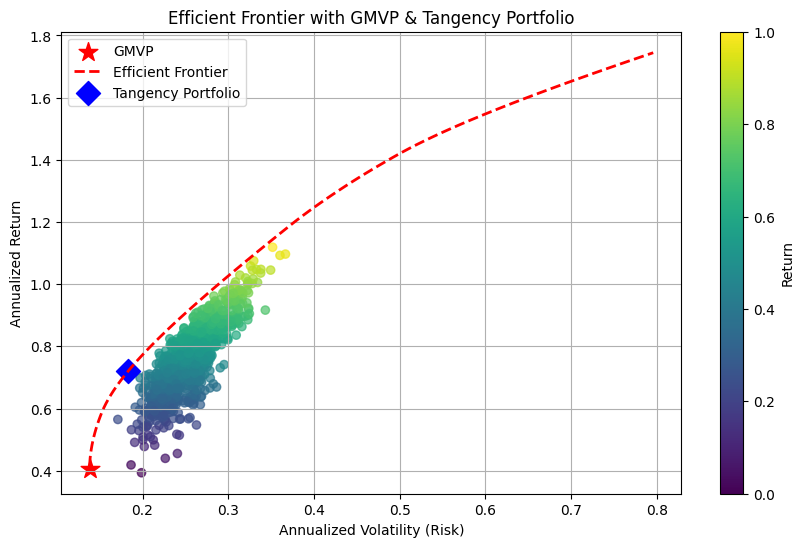

In [53]:
plt.figure(figsize=(10, 6))

# Monte Carlo cloud
plt.scatter(volatility_list, returns_list, c=returns_list, cmap='viridis', alpha=0.7)

# GMVP (Global Minimum Variance Portfolio)
plt.scatter(gmvp_volatility, gmvp_return, color='red', marker='*', s=200, label='GMVP')

# Efficient Frontier curve
plt.plot(efficient_volatility, target_returns, 'r--', linewidth=2, label='Efficient Frontier')

# Tangency Portfolio (Max Sharpe)
plt.scatter(tangency_risk, tangency_return, color='blue', marker='D', s=150, label='Tangency Portfolio')

# Labels, legend, colorbar
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier with GMVP & Tangency Portfolio')
plt.colorbar(label='Return')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
import pandas as pd

# === 1. Save Tangency Portfolio (Max Sharpe) ===
tangency_data = {
    "Weights": tangency_weights,
    "Expected Return": tangency_return,
    "Volatility": tangency_risk,
    "Sharpe Ratio": tangency_sharpe
}
tangency_df = pd.DataFrame(tangency_data, index=tickers)
tangency_df.to_csv("tangency_portfolio.csv")

# === 2. Save GMVP (Global Minimum Variance Portfolio) ===
gmvp_data = {
    "Weights": gmvp_weights,
    "Expected Return": [gmvp_return]*len(tickers),
    "Volatility": [gmvp_volatility]*len(tickers)
}
gmvp_df = pd.DataFrame(gmvp_data, index=tickers)
gmvp_df.to_csv("gmvp_portfolio.csv")

# === 3. Save Efficient Frontier ===
efficient_df = pd.DataFrame({
    "Target Return": target_returns,
    "Volatility": efficient_volatility,
    "Weights": efficient_weights
})
efficient_df.to_csv("efficient_frontier.csv", index=False)

print("✅ Tangency, GMVP, and Efficient Frontier data saved as CSV files.")


✅ Tangency, GMVP, and Efficient Frontier data saved as CSV files.
